# Diabetes Prediction

## Loading the dataset

In [3]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0%|                                               | 0.00/8.91k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 8.91k/8.91k [00:00<00:00, 18.1MB/s]


In [4]:
!unzip pima-indians-diabetes-database.zip -d pima-indians-diabetes-database

Archive:  pima-indians-diabetes-database.zip
  inflating: pima-indians-diabetes-database/diabetes.csv  


In [5]:
import pandas as pd
path = '/kaggle/working/pima-indians-diabetes-database/diabetes.csv'
df = pd.read_csv(path)
print("✔")

✔


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# to display stats about data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# to display basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Check for zero values
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
#sorting according to outcome
df = df.sort_values('Outcome')
df.head()
#seperating 0 and 1 values, so that i can handle 0 values of them seperatley
grouped = df.groupby(df.Outcome)
dfzero = grouped.get_group(0)
dfone =grouped.get_group(1)
dfone.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
746,1,147,94,41,0,49.3,0.358,27,1
618,9,112,82,24,0,28.2,1.282,50,1
13,1,189,60,23,846,30.1,0.398,59,1
619,0,119,0,0,0,32.4,0.141,24,1
701,6,125,78,31,0,27.6,0.565,49,1


In [12]:
#replacing with median for 1 values
dfone['Pregnancies']=dfone['Pregnancies'].replace(0,dfone['Pregnancies'].median())
dfone['Glucose']=dfone['Glucose'].replace(0,dfone['Glucose'].median())
dfone['BloodPressure']=dfone['BloodPressure'].replace(0,dfone['BloodPressure'].median())
dfone['SkinThickness']=dfone['SkinThickness'].replace(0,dfone['SkinThickness'].median())
dfone['Insulin']=dfone['Insulin'].replace(0,dfone['Insulin'].mean())
dfone['BMI']=dfone['BMI'].replace(0,dfone['BMI'].median())

#replacing with median for 0 values
dfzero['Pregnancies']=dfzero['Pregnancies'].replace(0,dfzero['Pregnancies'].median())
dfzero['Glucose']=dfzero['Glucose'].replace(0,dfzero['Glucose'].median())
dfzero['BloodPressure']=dfzero['BloodPressure'].replace(0,dfzero['BloodPressure'].median())
dfzero['SkinThickness']=dfzero['SkinThickness'].replace(0,dfzero['SkinThickness'].median())
dfzero['Insulin']=dfzero['Insulin'].replace(0,dfzero['Insulin'].mean())
dfzero['BMI']=dfzero['BMI'].replace(0,dfzero['BMI'].median())
df = pd.concat([dfzero,dfone])
df.head()

/tmp/ipykernel_33/501171896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfone['Pregnancies']=dfone['Pregnancies'].replace(0,dfone['Pregnancies'].median())
/tmp/ipykernel_33/501171896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfone['Glucose']=dfone['Glucose'].replace(0,dfone['Glucose'].median())
/tmp/ipykernel_33/501171896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
383,1,90,62,18,59.0,25.1,1.268,25,0
465,2,124,56,13,105.0,21.8,0.452,21,0
466,2,74,52,10,36.0,27.8,0.269,22,0
467,2,97,64,36,100.0,36.8,0.600,25,0
469,6,154,78,41,140.0,46.1,0.571,27,0


In [13]:
(df == 0).sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## Model Training

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Outcome')
y = df['Outcome']
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

In [17]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# logistic regression model training
model.fit(x_train, y_train)

# print metric to get performance
print("Accuracy", model.score(x_test, y_test) * 100)

Accuracy 78.35497835497836


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# knn = k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

# knn model training
model.fit(x_train, y_train)

# print metric to get performance
print("Accuracy", model.score(x_test, y_test) * 100)

Accuracy 82.68398268398268


In [19]:
# high level model - decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# decision tree model training
model.fit(x_train, y_train)

# print metric to get performance
print("Accuracy", model.score(x_test, y_test) * 100)

Accuracy 86.58008658008657


In [20]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# gaussian naive bayes model training
model.fit(x_train, y_train)

# print metric to get performance
print("Accuracy", model.score(x_test, y_test) * 100)

Accuracy 75.32467532467533


In [21]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

# Instantiate the model
model = SVC()

# Train the model
model.fit(x_train, y_train)

# Print metrics to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)


Accuracy: 80.08658008658008


In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier()

# Train the model
model.fit(x_train, y_train)

# Print metrics to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)


Accuracy: 87.44588744588745


In [23]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
model = GradientBoostingClassifier()

# Train the model
model.fit(x_train, y_train)

# Print metrics to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)

Accuracy: 90.9090909090909


In [24]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the model
model = AdaBoostClassifier()

# Train the model
model.fit(x_train, y_train)

# Print metrics to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)

Accuracy: 87.44588744588745


In [25]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate the model
model = ExtraTreesClassifier()

# Train the model
model.fit(x_train, y_train)

# Print metrics to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)


Accuracy: 85.28138528138528


In [26]:
# CatBoost
from catboost import CatBoostClassifier

# Instantiate the model
model = CatBoostClassifier()

# Train the model
model.fit(x_train, y_train)

# Print metrics to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)


Learning rate set to 0.0079
0:	learn: 0.6840092	total: 54ms	remaining: 53.9s
1:	learn: 0.6767837	total: 55.4ms	remaining: 27.6s
2:	learn: 0.6694955	total: 56.7ms	remaining: 18.8s
3:	learn: 0.6619666	total: 57.9ms	remaining: 14.4s
4:	learn: 0.6553838	total: 59.1ms	remaining: 11.8s
5:	learn: 0.6477592	total: 60.4ms	remaining: 10s
6:	learn: 0.6405489	total: 61.5ms	remaining: 8.72s
7:	learn: 0.6331925	total: 62.7ms	remaining: 7.78s
8:	learn: 0.6270738	total: 63.9ms	remaining: 7.04s
9:	learn: 0.6199090	total: 65.2ms	remaining: 6.45s
10:	learn: 0.6134334	total: 66.4ms	remaining: 5.97s
11:	learn: 0.6084224	total: 67.6ms	remaining: 5.57s
12:	learn: 0.6020867	total: 68.9ms	remaining: 5.23s
13:	learn: 0.5955557	total: 70.2ms	remaining: 4.94s
14:	learn: 0.5895362	total: 71.4ms	remaining: 4.69s
15:	learn: 0.5816223	total: 72.6ms	remaining: 4.46s
16:	learn: 0.5752654	total: 73.8ms	remaining: 4.27s
17:	learn: 0.5698615	total: 75.1ms	remaining: 4.09s
18:	learn: 0.5646185	total: 76.3ms	remaining: 3.94

In [88]:
# XGBoost
import xgboost as xgb

# Instantiate the model
model = xgb.XGBClassifier()

# Train the model
model.fit(x_train, y_train)

# Print metrics to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)

Accuracy: 72.72727272727273


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [28]:
# Print metrics to get performance
print("Accuracy:", grid_search.score(x_test, y_test) * 100)

Accuracy: 85.71428571428571


Text(0, 0.5, 'Error Rate')

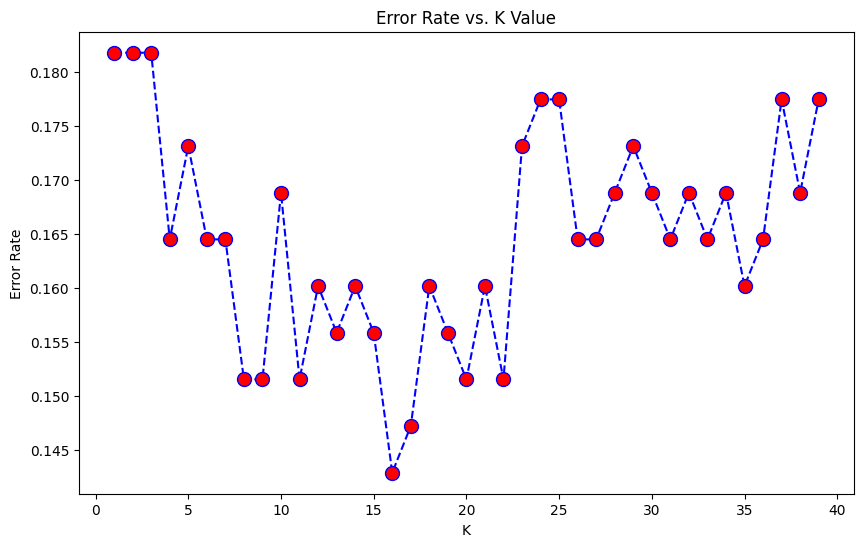

In [31]:
import numpy as np
import matplotlib.pyplot as plt

#k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

error_rate = []
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

WITH K=35


              precision    recall  f1-score   support

           0       0.90      0.85      0.88       156
           1       0.73      0.81      0.77        75

    accuracy                           0.84       231
   macro avg       0.82      0.83      0.82       231
weighted avg       0.85      0.84      0.84       231



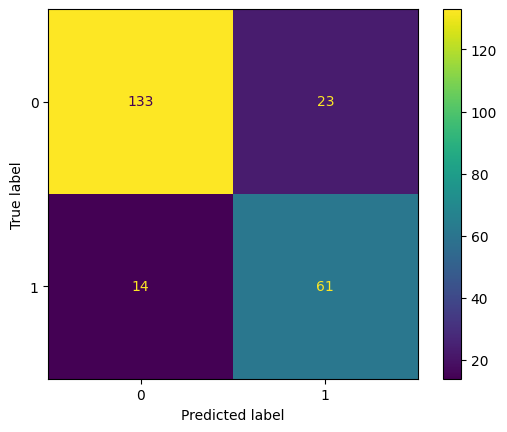

In [32]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
knn = KNeighborsClassifier(n_neighbors=35, weights = 'uniform')

knn.fit(x_train,y_train)
pred = knn.predict(x_test)
y_pred_proba = knn.predict_proba(x_test)[:, 1]
print('WITH K=35')
print('\n')
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#confusion matrix
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       156
           1       0.74      0.84      0.79        75

    accuracy                           0.85       231
   macro avg       0.83      0.85      0.84       231
weighted avg       0.86      0.85      0.85       231



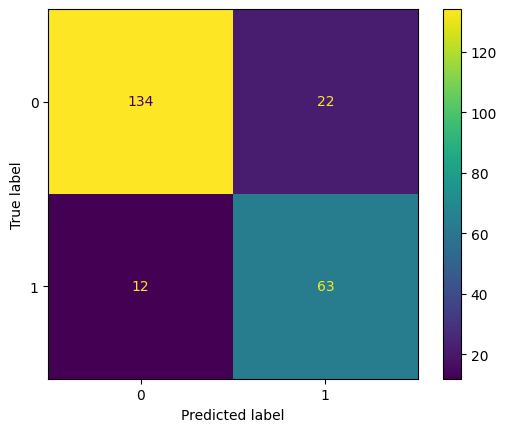

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#confusion matrix
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       156
           1       0.71      0.96      0.82        75

    accuracy                           0.86       231
   macro avg       0.84      0.89      0.85       231
weighted avg       0.89      0.86      0.87       231



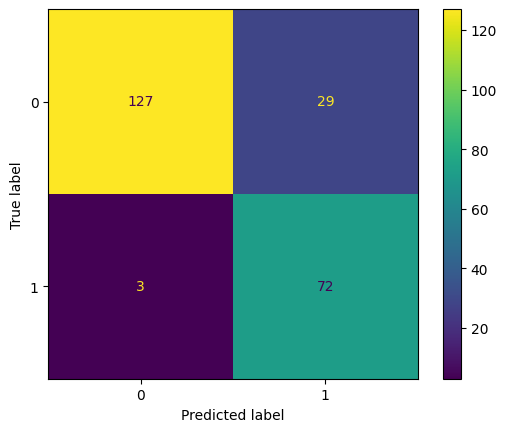

In [34]:
y_pred = (rfc.predict_proba(x_test)[:,1] >= 0.37).astype(bool)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#confusion matrix
disp.plot()
plt.show()